In [105]:
import numpy as np
import matplotlib.pyplot as plt

In [106]:
def hinge_loss(b:float, w: np.array, x: np.array, y: float):
    """
    we are calculating the the loss as : 0 if its correctly classified(<w,x> >= +1 or -1)
    else, return 1-y*(<w,x>)
    """
    return max(0, 1 - y * (np.dot(w, x) - b))

def gradient_hinge_loss(b:float, w: np.array, x: np.array, y_class: float, λ:float):
    if y_class*(np.dot(w,x)-b) >= 1:
        return 2 * λ * w, 0
    else:
        return 2 * λ * w - y_class*x, y_class

In [107]:
class BinarySVM:
    def fit(self,X,Y,w=None,b=0,lr=0.05,max_steps=500):
        if w == None:
            w = np.zeros(len(X[0]))
        if b == None:
            b = 0
        λ = 0.01

        losses = []
        for step in range(max_steps):
            for i in range(len(X)):
                x = X[i]
                y = Y[i]
                y_class = 1 if y>0 else -1
                w_prev = w.copy()
                b_prev = b

                decr_w,decr_b = gradient_hinge_loss(b,w,x,y_class,λ)

                w = w_prev - lr*decr_w
                b = b_prev - lr*decr_b
                loss = hinge_loss(b,w,x,y)
                losses.append(loss)
        self.w = w
        self.b = b

        plt.scatter([_ for _ in range(len(losses))],losses)
        plt.title("value of loss function over time")
        plt.show()

    def predict_y(self,b, w, x):
        return 1 if np.dot(w, x)-b > 0 else -1

In [108]:
def insert_ones(array2d:np.array):
    """
    So, we don't want to write extra boiler plate code or formula for calculating the 
    bias separately. That's why we will make it part of the weights w itself.
    Since we are doing that, np.dot(x,w) will also need another term in x to account
    for the extra bias term. so we will just put a one at the starting of each x vector
    (2,3,5) --> (1,2,3,5)

    this function just puts a column of 1 into the left side of the X array
    """
    return np.insert(array2d,0,values=1,axis=1)

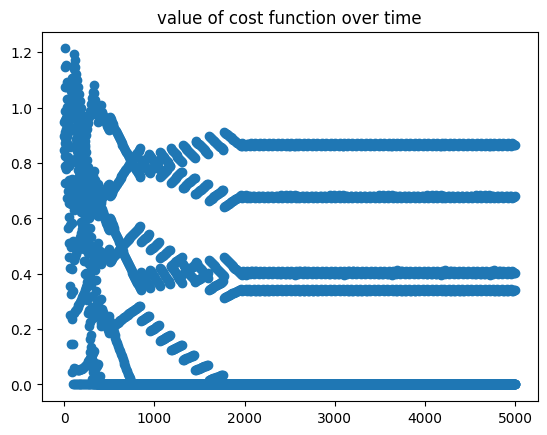

In [109]:
clf = BinarySVM()
#student scores vs pass(+1) or fail(-1)
X = np.array(
   [np.array([x_temp]) for x_temp in [0.05, +0.1, +0.2, +0.3, +0.4, +0.5, +0.6, +0.7, +0.8, +0.9]]
)
Y = np.array([-1,-1,-1,-1,-1, +1, +1, +1, +1, +1])
clf.fit(X,Y)

In [110]:
print(clf.w)

[4.02077568]


In [111]:
clf.predict_y(clf.b, clf.w, X[6])

1